In [159]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [160]:
data = pd.read_csv('dataset.csv')

In [161]:
data

,height,weight
0,186.63,90.97
1,169.75,62.76
2,168.66,56.16
3,173.03,64.37
4,172.21,64.71
...,...,...
95,177.35,75.14
96,184.21,87.52
97,169.29,58.30
98,161.55,50.61


In [162]:
def train_test_split(data, test):
    df = data.sample(frac=1).reset_index(drop=True)
    len_test = int(test*len(df))
    len_trin = len(df)-len_test
    return(df[:len_trin], df[:len_test])

In [163]:
train_data, test_data = train_test_split(data, 0.4)

In [164]:
train_data = np.array(train_data)
test_data = np.array(test_data)

## Зависимость линейная

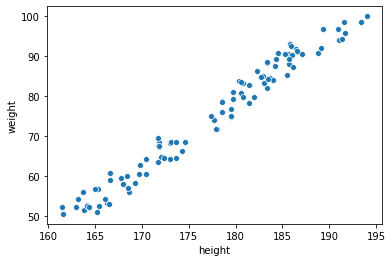

In [165]:
sns.scatterplot(x='height', y='weight', data=data)

## метод наименьших квадратов
### так как у нас всего одна переменная, оптимальнее всего воспользоваться методом наименьших квадратов
### на обучающей выборке подберем коэффициенты a и b для уравнения y=a+bx таким образом, чтобы полученная прямая наилучшим образом соответствовала обучающей выборке

In [166]:
x = train_data[::,0]
y = train_data[::,1]

In [167]:
b_ch = (len(train_data)*(x*y).sum())-(x.sum()*y.sum())

In [168]:
b_zn = len(train_data) * (x**2).sum() - x.sum()**2

In [169]:
b = b_ch/b_zn

In [170]:
b

1.6252237676683516

In [171]:
a = (y.sum()*((x**2).sum()) - (x.sum()* (x*y).sum()))/b_zn

### посмотрим на прямую, которая описывает нашу тестовую быборку

In [172]:
xi = test_data[::,0]
yi = test_data[::,1]

In [173]:
y_pred = a + b*xi

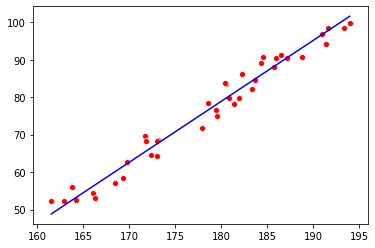

In [174]:
sns.lineplot(xi, y_pred, color='b')
sns.scatterplot(xi, yi, color='r')

### посмотрим на mse наших прогнозов

In [175]:
from sklearn.metrics import mean_squared_error as mse

In [176]:
mse_our = mse(yi, y_pred)
mse_our

6.328708943652696

### воспользуемся линейной регрессией из sklearn

In [177]:
from sklearn.linear_model import LinearRegression

In [178]:
linR = LinearRegression()
linR.fit(train_data[::,0].reshape((-1, 1)), train_data[::,1])
sk_res = linR.predict(test_data[::,0].reshape((-1, 1)))

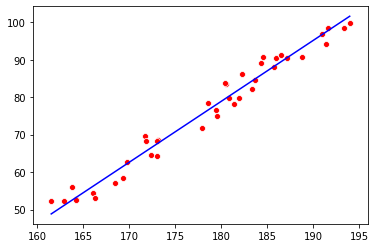

In [179]:
sns.lineplot(xi, sk_res, color='b')
sns.scatterplot(xi, yi, color='r')

In [180]:
mse_sk = mse(yi, sk_res)
mse_sk

6.328708943653517

### Модель дает приблизительно такие же результаты, что и модель из sklearn. Также видно что она хорошо описывает как обучающую? так и тестовую выборку данных